![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [7]:
bikes.head(20)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,5
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,6
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,7
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,8


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [6]:
# Celda 1.1
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

En los dos casos anteriores, para la variable **workingday** que nos indica si el rental fue en un dia de trabajo siendo 1 cierto y 0 si fue un dia de holiday o findes de semana. Aqui podemos ver como la media del total de rentals es mayor, por 5 puntos lo que nos podria indicar que los fines de semana y festivos hay menos rentals totales que los dias entre semana.

Ahora si vemos el caso de la variable **hour** podemos ver como esta nos muestra los rentals sin importar el dia solo a que hora fueron, en este caso vemos que de 5pm y 6pm son las horas en las que hay más rentals superando 400 rentals y las 3am y 4ma son las horas con menos rentals, mirandolo desde el promedio.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

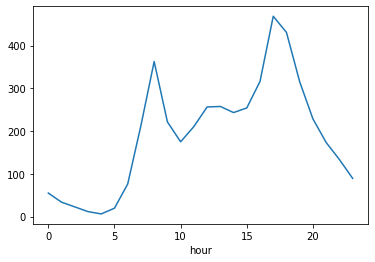

In [11]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

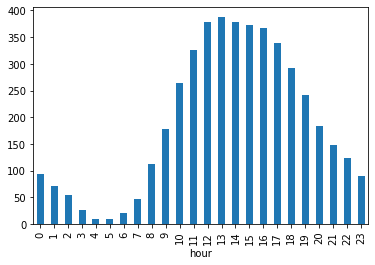

In [17]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos 

bikes[bikes["workingday"]==0].groupby('hour').total.mean().plot.bar()

En la siguiente grafica realizada se observa el promedio de rentals totales por hora para los dias que son fines de semana y festivos.
Se observa un incremento desde las 9am hasta las 12pm, donde luego alcanza el minimo del dia a las 11pm. En este caso la hora con mas rentals es la 1pm y la hora con menos rentals es las 4am. 


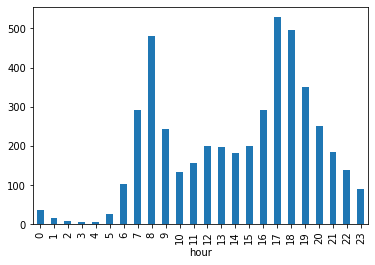

In [18]:
# Celda 2.3 - "workingday"=1 escriba su código y hallazgos 
bikes[bikes["workingday"]==1].groupby('hour').total.mean().plot.bar()

En la siguiente grafica realizada observamos como varian los rentals para los dias de trabajo, no festivos no fines de semana. Tambien observamos como la hora mas alta es a las 5pm y luego sigue las de las 8am y 6pm. Adicionalmente las horas con menor rentals es 3am y 4am

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [24]:
from sklearn.model_selection import train_test_split
X=bikes[['hour','workingday']]
y=bikes['total']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [30]:
# Celda 3
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)
print('Coeficientes [hour,workingday]',LR.coef_)
print('intercepto: ',LR.intercept_)
LR.score(X_test,y_test)

Coeficientes [hour,workingday] [10.49362402  5.20940956]
intercepto:  65.51115318266754


0.1522036159214991

Los coeficientes de la regresion lineal indican que la variable **hour** afecta en 10 positivamente y la variable **workingday** en 5 postivamente. Al ver el score es del 15%, lo que indica que el modelo lineal no es una buena opcion. Esto se puede identifcar tambien porque en las graficas no vemos relaciones lineales entre las variables. Son mas complejas lo que hace que un modelo linela no se pueda ajustar, ya que por partes tiene otros comportramientos.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [ ]:
# Celda 4


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [ ]:
# Celda 5


## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la populridad esta dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [ ]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

In [ ]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

In [ ]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [ ]:
# Celda 6


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

In [ ]:
# Celda 7


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [ ]:
# Celda 8


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [ ]:
# Celda 9